In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/input/True.csv
/content/drive/MyDrive/input/Fake.csv


In [ ]:
fake_news = pd.read_csv('/content/drive/MyDrive/input/Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_news.columns


Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake_news['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

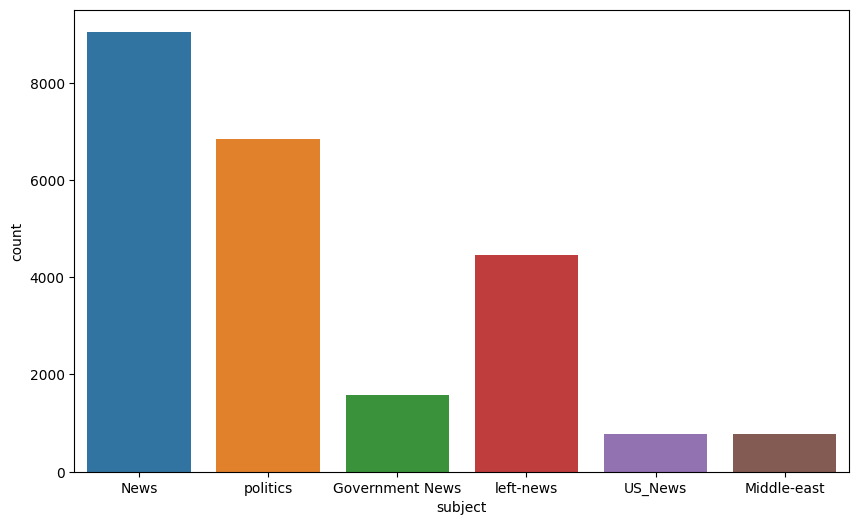

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake_news)

In [ ]:
text = ' '.join(fake_news['text'].tolist())


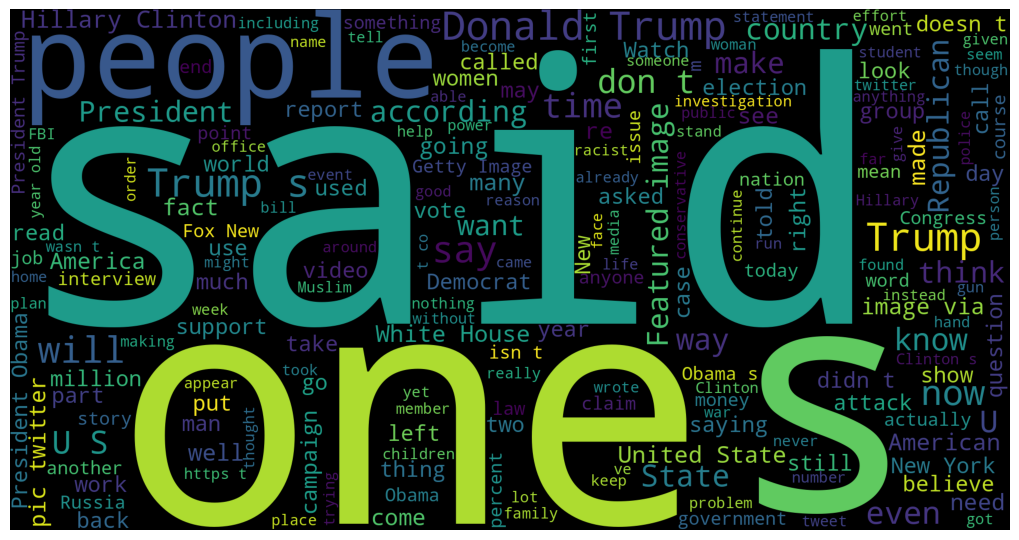

CPU times: user 36.9 s, sys: 1.32 s, total: 38.2 s
Wall time: 39.5 s


In [ ]:
%%time
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real_news = pd.read_csv('/content/drive/MyDrive/input/True.csv')
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
text = ' '.join(real_news['text'].tolist())

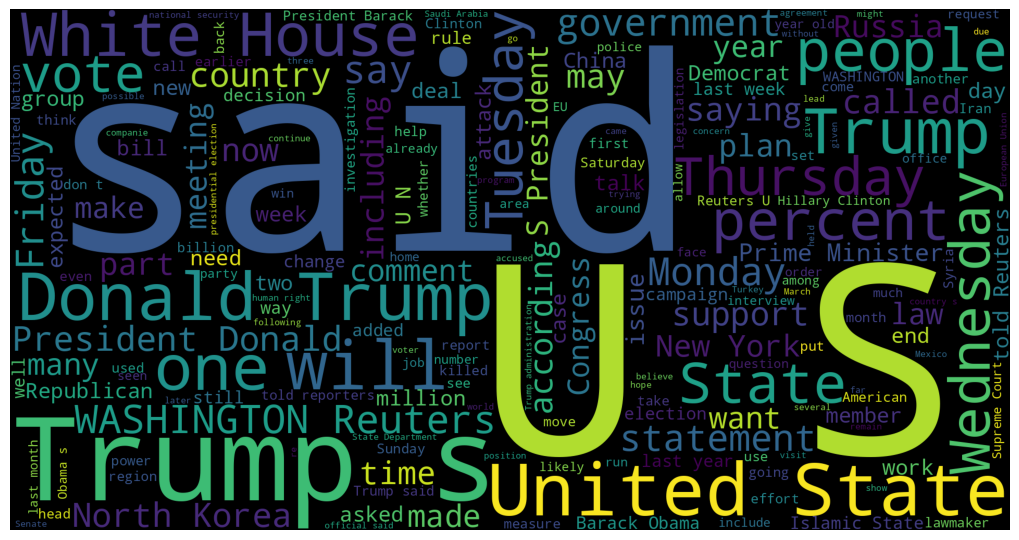

CPU times: user 34.6 s, sys: 1.12 s, total: 35.8 s
Wall time: 36 s


In [ ]:
%%time
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real_news.sample(5)

,title,text,subject,date
8741,Saudi says hopes release of '28 pages' clears ...,WASHINGTON (Reuters) - Saudi Arabia welcomed o...,politicsNews,"July 15, 2016"
11003,House fails to knock down Obama veto of anti-O...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"February 2, 2016"
1939,"Russia, digesting U.S. diplomatic retaliation,...",MOSCOW (Reuters) - Russia said on Friday it wo...,politicsNews,"September 1, 2017"
4224,U.S. Commerce Secretary: Eager to boost trade ...,TOKYO (Reuters) - U.S. Commerce Secretary Wilb...,politicsNews,"April 18, 2017"
2985,"Facing revolt on healthcare bill, U.S. Senate ...",WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,"June 27, 2017"


In [ ]:
unknown_pubishers = []
for index, row in enumerate(real_news.text.values):
    try:
        record = row.split(' - ', maxsplit=1)
        record[1]

        assert(len(record[0])<260)
    except:
        unknown_pubishers.append(index)

In [ ]:
len(unknown_pubishers)

35

In [ ]:
real_news.iloc[unknown_pubishers].text

2922     The following statements were posted to the ve...
3488     The White House on Wednesday disclosed a group...
3782     The following statements were posted to the ve...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5290     The following statements were posted to the ve...
5379     The following statements were posted to the ve...
5412     The following statements were posted to the ve...
5504     The following statements were posted to the ve...
5538     The following statements were posted to the ve...
5588     The following statements were posted to the ve...
5593     The following statements were posted to the ve...
5761     The following bullet points are from the U.S. ...
5784     Federal appeals court judge Neil Gorsuch, the ...
6026     The following bullet points are from the U.S. ...
6184     The following bullet points are from the U.S. ...
6660     Republican members of Congress are complaining.

In [ ]:
publisher =[]
tmp_text = []

for index, row in enumerate(real_news.text.values):
    if index in unknown_pubishers:
        tmp_text.append(row)
        publisher.append('Unknown')

    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [ ]:
real_news['publisher'] = publisher
real_news['text'] = tmp_text

In [ ]:
real_news.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real_news.shape

(21417, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake_news.text.tolist()) if str(text).strip()==""]

In [ ]:
fake_news.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real_news['text'] = real_news['title']+" "+ real_news['text']

In [ ]:
fake_news['text'] = fake_news['title']+" "+ fake_news['text']

In [ ]:
real_news['text'] = real_news['text'].apply(lambda x: str(x).lower())
fake_news['text'] = fake_news['text'].apply(lambda x: str(x).lower())

In [ ]:
real_news['class']=1
fake_news['class']=0

In [ ]:
real_news.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real_news[['text','class']]
fake = fake_news[['text','class']]

In [ ]:
data = real.append(fake, ignore_index=True)
data.head()

<ipython-input-28-8770c2a2a545>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1!
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2023-10-24 11:58:06.355901: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 11:58:06.355967: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X)

list

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window =10, min_count=1)

In [ ]:
w2v_model.wv['india']

array([-1.717186  ,  0.09980671, -0.54519814,  2.873516  ,  1.1529748 ,
       -1.612415  , -0.4013639 ,  1.5510874 , -1.9637966 ,  1.7516707 ,
        2.3293521 ,  1.0115958 , -1.7413545 ,  2.1367438 ,  0.30087247,
        2.0449893 ,  0.7790712 ,  3.5431712 , -3.6178732 , -2.512199  ,
        1.1306514 ,  1.4577612 ,  1.4371244 , -2.7274785 ,  0.8482319 ,
       -0.56985384,  0.39158794, -0.17285948, -1.384397  , -0.29015785,
        3.9670284 , -0.66227573, -0.49190876,  1.5287828 , -0.3802559 ,
        4.286491  , -1.8598944 ,  0.12558945,  2.3769717 ,  2.274344  ,
       -0.06563634, -2.254771  ,  2.0082936 , -0.8159753 , -2.254789  ,
       -0.83319783,  1.6255909 ,  0.84546375, -2.1749024 , -0.4050095 ,
       -0.20788828,  1.3658859 ,  3.4065766 , -0.53475   ,  0.80121416,
        0.32413623,  1.7693163 ,  0.5977933 ,  0.2685584 , -1.3846186 ,
        0.9586846 ,  1.2754706 , -2.076492  ,  0.3734416 ,  1.1651148 ,
        2.8482974 ,  0.03156389,  0.2842725 ,  2.050075  ,  0.03

In [ ]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7414124011993408),
 ('malaysia', 0.6891069412231445),
 ('china', 0.6626362204551697),
 ('australia', 0.645916759967804),
 ('beijings', 0.6376063227653503),
 ('norway', 0.6274385452270508),
 ('japan', 0.611946702003479),
 ('controlchina', 0.6110749244689941),
 ('indian', 0.6049240827560425),
 ('indias', 0.5988717079162598)]

In [ ]:
w2v_model.wv.most_similar('china')

[('beijing', 0.8647976517677307),
 ('taiwan', 0.8008958101272583),
 ('chinas', 0.7648460268974304),
 ('pyongyang', 0.6972832679748535),
 ('chinese', 0.6958582401275635),
 ('india', 0.6626362204551697),
 ('japan', 0.6597095131874084),
 ('beijings', 0.6444934010505676),
 ('xi', 0.6359792947769165),
 ('waterway', 0.6162828803062439)]

In [ ]:
w2v_model.wv.most_similar('usa')

[('mcculloughthis', 0.5617169141769409),
 ('wirecom', 0.5184991955757141),
 ('nl2n1gc0i1', 0.510539710521698),
 ('pacsharyl', 0.4913540482521057),
 ('pictwittercomsfe6zfdoli', 0.48563042283058167),
 ('orgs', 0.4720892906188965),
 ('pictwittercomzkutv76jll', 0.4677456021308899),
 ('biz', 0.4658149182796478),
 ('flopped', 0.4636586606502533),
 ('gospel', 0.4619619846343994)]

In [ ]:
w2v_model.wv.most_similar('gandhi')

[('rahul', 0.7698065638542175),
 ('75yearold', 0.6625608801841736),
 ('cristina', 0.6558746099472046),
 ('ozawa', 0.6513022184371948),
 ('tounes', 0.641105592250824),
 ('sobotka', 0.6337205171585083),
 ('grillo', 0.6289705038070679),
 ('loyalist', 0.6274853944778442),
 ('mediashy', 0.6266793012619019),
 ('pastrana', 0.6204155683517456)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

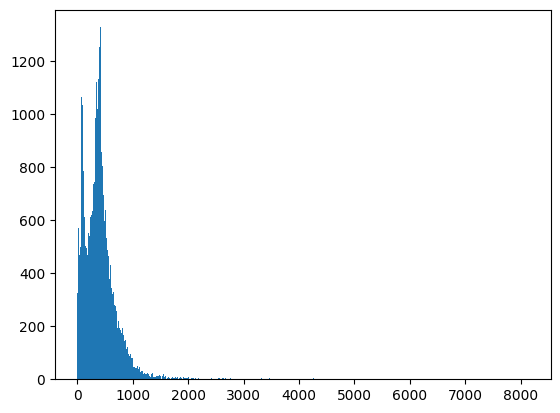

In [ ]:
plt.hist([len(x) for x in X], bins =700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])


1580

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab =tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))

    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]

    return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231850, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable = False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23185000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23302377 (88.89 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23185000 (88.44 MB)
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)




In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=1)

842/842 [==============================] - 42s 41ms/step - loss: 0.1594 - acc: 0.9393 - val_loss: 0.0484 - val_acc: 0.9841


In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 8s 23ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9824498886414254

In [ ]:
print(f"accuracy_score : {accuracy_score(y_test, y_pred).round(4)*100}%")

accuracy_score : 98.24000000000001%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5966
           1       0.97      0.99      0.98      5259

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [ ]:
x = ['this is a news']
import tensorflow as tf


In [ ]:
x = tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)



In [ ]:
(model.predict(x))

1/1 [==============================] - 0s 31ms/step


array([[0.00372225]], dtype=float32)

In [ ]:
if (model.predict(x) >=0.5).astype(int)==0:
    print("the input 'x' is fake news")
else:
    print("the input 'x' is real news")

1/1 [==============================] - 0s 30ms/step
the input 'x' is fake news


In [ ]:
model.predict(x)

1/1 [==============================] - 0s 51ms/step


array([[0.00372225]], dtype=float32)

In [ ]:
x = ['''The heart and neurological disorders have seen an uptick as a result of the post-COVID condition which reportedly began since the second wave of the virus, according to health experts.Speaking to ANI on Saturday, Dr Devi Prasad Shetty who is the Chairman of Narayana Health, and also an Executive Director, said that there was an increase in brain and heart-related issues during the second wave, however, in the present scenario, more data is required.

"COVID patients especially during the second wave, there was definitely a slight increase in the incidence of COVID patients developing clot forms, and clots in the brain or in the heart. But that pattern we saw only during the second wave. But we need to really get the data and then only I can say, whether it is really the case, but we did see a slightly higher incidence of brain stroke and heart problems," Dr Shetty said.
However, Dr Nitish Naik, Professor, Department of Cardiology, AIIMS, Delhi said that the study about the role of COVID in precipitating acute cardiac problems after recovery is still evolving. "All flu like illnesses have always been associated with increased risk of cardiac health-related issues. This has been known for many years and Covid is also behaving similarly. Our knowledge about the role of Covid 19 in precipitating acute cardiac problems after recovery is still evolving. While there are reports of heart involvement even after even mild COVID infections, the vast majority will recover without the need for any investigations or interventions," he said.

The expert explained that it can happen that some persons may experience persistent aches and pains, fatigue and palpitations during the recovery phase like after any viral illness.''']

x = tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)

print((model.predict(x)))

if (model.predict(x) >=0.3).astype(int)==0:
    print("the input 'x' is fake news")
else:
    print("the input 'x' is real news")

1/1 [==============================] - 0s 66ms/step
[[0.98325956]]
1/1 [==============================] - 0s 47ms/step
the input 'x' is real news
